# Data Challenge By Xianyuan(Sarah) Zhou

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import squarify    

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('/Users/hayleychou/Desktop/JOB/datachallenge/Data Breaches - Raw Data.csv')

# 1.Data Description

### These data  set collect news of personal data leakage incidents with: 
<ol><li> Entity: entity related to the data leakage, </li><li> alternative name: entity's alternative name, </li><li> records lost: number of records lost, </li><li> YEAR: year story broke, </li><li> story: details, </li><li> SECTOR: entity type<br>web\healthcare\app\retail\gaming\transport\financial\tech\government\telecoms\legal\media\academic\energy\military, </li><li> METHOD: reason of leakage<br>poor security\hacked\oops!\lost device\inside job, </li><li> interesting story, </li><li> DATA SENSITIVITY: interge shows the senstivity level of records<br>1. Just email address/Online information 
2 SSN/Personal details 
3 Credit card information 
4 Health & other personal records 
5 Full details, </li><li> DISPLAYED RECORDS, </li><li> Unnamed: 10: empty, </li><li> source name: name of news source, </li><li> 1st source link: 1st link to the news, </li><li> 2nd source link: 2nd link to the news

In [5]:
df.head(5)

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,Unnamed: 10,source name,1st source link,2nd source link
0,NaN,NaN,NaN,year story broke,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN,NaN
1,US Customs and Border Protection,NaN,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,y,2,NaN,NaN,Washington Post,https://www.washingtonpost.com/technology/2019...,NaN
2,Click2Gov,NaN,"300,000",2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,NaN,3,NaN,NaN,Fortune,http://fortune.com/2018/12/18/click2gov-local-...,NaN
3,SingHealth,NaN,"1,500,000",2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,NaN,4,NaN,NaN,Straits Times,https://www.straitstimes.com/singapore/persona...,NaN
4,Quest Diagnostics,NaN,"11,900,000",2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,NaN,4,NaN,NaN,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...,NaN


In [6]:
print("There are {} records of personal data leakage.".format(len(df)-1))

There are 339 records of personal data leakage.


In [170]:
df.shape

(340, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             339 non-null    object 
 1   alternative name   136 non-null    object 
 2   records lost       338 non-null    object 
 3   YEAR               340 non-null    object 
 4   story              339 non-null    object 
 5   SECTOR             340 non-null    object 
 6   METHOD             340 non-null    object 
 7   interesting story  69 non-null     object 
 8   DATA SENSITIVITY   340 non-null    object 
 9   DISPLAYED RECORDS  33 non-null     object 
 10  Unnamed: 10        0 non-null      float64
 11  source name        339 non-null    object 
 12  1st source link    339 non-null    object 
 13  2nd source link    32 non-null     object 
dtypes: float64(1), object(13)
memory usage: 37.3+ KB


# 2.Data Cleansing & Validation

We need to delete the empty coliumn and the first row of data description.

In [7]:
df = df.drop([0]).drop(columns=['Unnamed: 10']).reset_index()

Change column names

In [8]:
df.columns = ['Index',
             'Entity',
             'AlternativeName',
             'RecordsLost',
             'YEAR',
             'Story',
             'SECTOR',
             'METHOD',
             'InterestingStory',
             'DATA_SENSITIVITY',
             'DISPLAYED_RECORDS',
             'SourceName',
             '1stSourceLink',
             '2ndSourceLink']

In [9]:
df.head(5)

,Index,Entity,AlternativeName,RecordsLost,YEAR,Story,SECTOR,METHOD,InterestingStory,DATA_SENSITIVITY,DISPLAYED_RECORDS,SourceName,1stSourceLink,2ndSourceLink
0,1,US Customs and Border Protection,NaN,"100,000",2019,June 2019. Photos of travellers' faces and lic...,government,hacked,y,2,NaN,Washington Post,https://www.washingtonpost.com/technology/2019...,NaN
1,2,Click2Gov,NaN,"300,000",2018,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,NaN,3,NaN,Fortune,http://fortune.com/2018/12/18/click2gov-local-...,NaN
2,3,SingHealth,NaN,"1,500,000",2018,July 2018. Hackers stole personal details of 1...,healthcare,hacked,NaN,4,NaN,Straits Times,https://www.straitstimes.com/singapore/persona...,NaN
3,4,Quest Diagnostics,NaN,"11,900,000",2019,June 2019. One of the biggest blood testing pr...,healthcare,poor security,NaN,4,NaN,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...,NaN
4,5,Australian National University,NaN,"200,000",2019,June 2019. A hacker accessed personal informat...,academic,hacked,NaN,4,NaN,Guardian,https://www.theguardian.com/australia-news/201...,NaN


By cecking unique vlaues and counts for each column:<br>
1.some rows have more then one item in SECTOR, they need to be splited<br>
2.column RecordsLost needs cleaning&bin<br>
3.Entity needs cleaning<br>
4.all the columns are object, we need to change column data type for analysis using

In [9]:
for i in df.columns:
    print(i, df[i].nunique())

Index 339
Entity 319
AlternativeName 135
RecordsLost 220
YEAR 17
Story 338
SECTOR 24
METHOD 5
InterestingStory 1
DATA_SENSITIVITY 6
DISPLAYED_RECORDS 30
SourceName 165
1stSourceLink 319
2ndSourceLink 32


In [11]:
for i in df.columns:
    if df[i].nunique() < 30:
        print(df[i].value_counts(dropna=False))

2018    44
2011    37
2013    35
2016    33
2019    33
2017    25
2015    24
2012    23
2008    21
2014    19
2010    15
2009    10
2007    10
2006     5
2005     3
2004     1
1999     1
Name: YEAR, dtype: int64
web                       97
healthcare                43
government                39
financial                 36
retail                    25
app                       20
telecoms                  16
gaming                    12
academic                  10
transport                  9
tech                       6
military                   4
tech, web                  4
media                      4
energy                     3
government, healthcare     2
tech, retail               2
legal                      1
web, gaming                1
web, tech                  1
military, healthcare       1
web, military              1
government, military       1
tech, app                  1
Name: SECTOR, dtype: int64
hacked           214
lost device       47
poor security     39
oo

In [12]:
df['SECTOR'].value_counts(dropna=False)

web                       97
healthcare                43
government                39
financial                 36
retail                    25
app                       20
telecoms                  16
gaming                    12
academic                  10
transport                  9
tech                       6
military                   4
tech, web                  4
media                      4
energy                     3
government, healthcare     2
tech, retail               2
legal                      1
web, gaming                1
web, tech                  1
military, healthcare       1
web, military              1
government, military       1
tech, app                  1
Name: SECTOR, dtype: int64

In [13]:
df['SECTOR'].str.contains(',').sum()

14

In [9]:
df2 = df.copy()

In [10]:
df2["SECTOR"]=df["SECTOR"].str.split(', ')
df3 = df2.explode("SECTOR").reset_index(drop=True)

In [11]:
df3.SECTOR.value_counts(dropna=False)

web           104
healthcare     46
government     42
financial      36
retail         27
app            21
telecoms       16
tech           14
gaming         13
academic       10
transport       9
military        7
media           4
energy          3
legal           1
Name: SECTOR, dtype: int64

In [12]:
df3['RecordsLostClean'] = pd.to_numeric(df2.RecordsLost.apply(lambda s: float(s.rstrip('M')) * 1000000 if 'M' in str(s) else\
                      0 if 'ALL' == str(s) else\
                      0 if s is None else\
                      float(str(s).replace(',', '').replace('<', ''))), errors='ignore')

In [13]:
df3['RecordsLostBin'] = pd.cut(df3['RecordsLostClean'],bins=[0,250000,500000,1000000,5000000,10000000,50000000,1000000000])

In [14]:
df3['RecordsLostBin'].value_counts()

(1000000, 5000000]        84
(0, 250000]               60
(10000000, 50000000]      59
(50000000, 1000000000]    44
(250000, 500000]          30
(5000000, 10000000]       30
(500000, 1000000]         26
Name: RecordsLostBin, dtype: int64

In [58]:
df3['Entity'] = df3['Entity'].str.replace('"', '')

In [59]:
df3['Entity'].value_counts()

Apple                                              4
Facebook                                           3
AOL                                                3
Uber                                               3
Citigroup                                          3
Yahoo                                              3
Tricare                                            2
Countrywide Financial Corp                         2
JP Morgan Chase                                    2
SnapChat                                           2
RockYou!                                           2
Dropbox                                            2
Amazon                                             2
British Airways                                    2
Quest Diagnostics                                  2
Hewlett Packard                                    2
Medicaid                                           2
US Dept of Vet Affairs                             2
Ubuntu                                        

Chang column data type

In [15]:
df3['DATA_SENSITIVITY'] = pd.to_numeric(df3['DATA_SENSITIVITY'])

Also have checked null values in each column, we can see most of DISPLAYED_RECORDS, 2ndSourceLin, InterestingStory, AlternativeName are null, but we are good to go with them.

In [164]:
df.isnull().sum().sort_values(ascending=False)

DISPLAYED_RECORDS    307
2ndSourceLink        307
InterestingStory     270
AlternativeName      203
RecordsLost            1
Index                  0
Entity                 0
YEAR                   0
Story                  0
SECTOR                 0
METHOD                 0
DATA_SENSITIVITY       0
SourceName             0
1stSourceLink          0
dtype: int64

# 3.Data Mining

After data cleaning, now we can dive into the data.<br>
How to evaluate a dangerous level of a data leakage?
We can start with RecordsLost, DATA_SENSITIVITY, more records lost, more people affected, in the meantime, a deeper effect with a more sensitive data. And we can track the trand with YEAR, using SECTOR to now how these entity distributed.

In [16]:
df3['METHOD'].value_counts(dropna=False)

hacked           223
lost device       50
poor security     40
oops!             21
inside job        19
Name: METHOD, dtype: int64

Most data leakage caused by hacking

In [60]:
df3['Entity'].value_counts(dropna=False).to_frame().reset_index().loc[np.where(df3['Entity'].value_counts(dropna=False).to_frame().reset_index().Entity > 1)]

,index,Entity
0,Apple,4
1,Facebook,3
2,AOL,3
3,Uber,3
4,Citigroup,3
5,Yahoo,3
6,Tricare,2
7,Countrywide Financial Corp,2
8,JP Morgan Chase,2
9,SnapChat,2


Only 29 entities happened more than once data leakage, 5 entities have 3 times, 1 entity has 4 times

In [218]:
df3.RecordsLostClean.describe()

count          338.00
mean      40085525.47
std      144384020.06
min              0.00
25%         427500.00
50%        3000000.00
75%       18000000.00
max     1370000000.00
Name: RecordsLostClean, dtype: float64

A data leakage caused more tham 4 million records lost on average.

In [224]:
df3.groupby('YEAR')['RecordsLostClean'].agg(['max','mean','count'])

,max,mean,count
YEAR,,,
1999,1800000.00,1800000.00,1
2004,NaN,NaN,0
2005,NaN,NaN,0
2006,NaN,NaN,0
2007,92000000.00,20060714.29,7
2008,94000000.00,10942090.71,21
2009,18000000.00,4647416.67,12
2010,130000000.00,17267385.20,15
2011,77000000.00,5125489.97,38


In [223]:
df3.loc[df3.RecordsLostClean == df3.RecordsLostClean.max(),'YEAR'].values[0]

'2017'

From 1999 to 2019, there are more data leakages happened after 2008. In 2017, largest number of records lost, 2018 has more data leakages than other years.

In [222]:
df3.groupby('SECTOR')['RecordsLostClean'].agg(['mean','count'])

,mean,count
SECTOR,,
academic,29719535.00,10
app,57788047.62,21
energy,15066666.67,3
financial,45426532.63,30
gaming,4862808.85,13
government,65336147.82,39
healthcare,7366016.30,46
legal,11500000.00,1
media,13086500.00,4


In [225]:
df3.groupby('SECTOR')['DATA_SENSITIVITY'].agg(['max','mean','count'])

,max,mean,count
SECTOR,,,
academic,4,2.60,10
app,7,2.24,21
energy,3,2.33,3
financial,5,2.86,36
gaming,3,1.46,13
government,5,2.64,42
healthcare,5,3.37,46
legal,5,5.00,1
media,3,2.00,4


In [231]:
df3.loc[df3.RecordsLostClean == df3.RecordsLostClean.max(),['YEAR','Entity','SECTOR']].values[0]

array(['2017', 'River City Media', 'web'], dtype=object)

In [230]:
df3.loc[df3.DATA_SENSITIVITY == df3.DATA_SENSITIVITY.max(),['YEAR','Entity','SECTOR']].values[0]

array(['2019', 'Animoto', 'app'], dtype=object)

Compared SECTOR with RecordsLost & DATA_SENSITIVITY, we can see that the web has more frequent data leakage with the largest number(102), legal only has one, but its sensitivity level is high to 5. The largest data leakage is River City Media in 2017 from the web and Animoto data leakage in 2019 from the app has the highest sensitivity level of 7, healthcare has lost a higher sensitivity level of data than other sectors.

# 4.Data Visualization

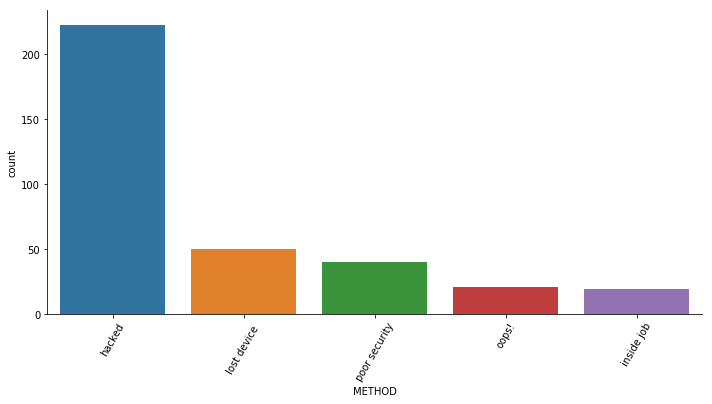

In [39]:
plot_data = df3['METHOD'].value_counts(dropna=False).to_frame().reset_index()
plot_data.columns=['METHOD','count']
g = sns.catplot(x="METHOD", y="count",kind='bar', data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

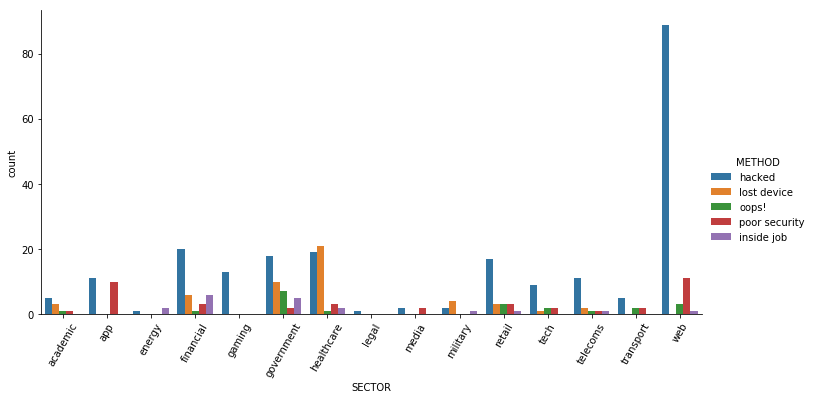

In [48]:
plot_data = df3.groupby(['SECTOR','METHOD']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','METHOD','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "METHOD" ,data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

Most data leakage caused by hacking, but for healthcare, lost device caused the largest nmuber of data leakage.

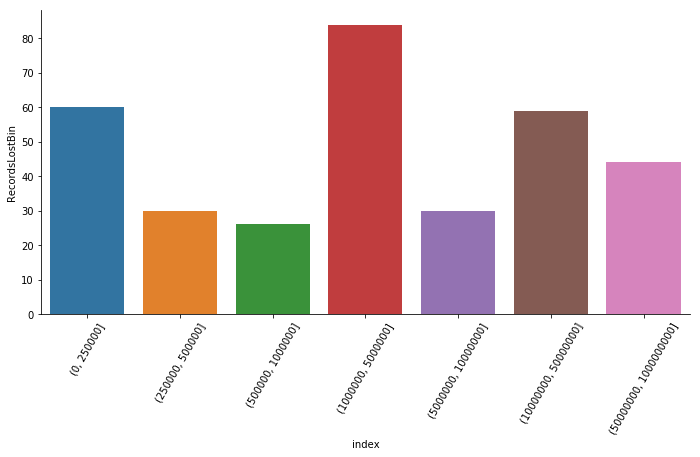

In [176]:
plot_data = df3['RecordsLostBin'].value_counts().to_frame().reset_index()
g = sns.catplot(x="index", y="RecordsLostBin",kind='bar', data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

In [218]:
df3.RecordsLostClean.describe()

count          338.00
mean      40085525.47
std      144384020.06
min              0.00
25%         427500.00
50%        3000000.00
75%       18000000.00
max     1370000000.00
Name: RecordsLostClean, dtype: float64

In [14]:
df3['RecordsLostBin'].value_counts()

(1000000, 5000000]        84
(0, 250000]               60
(10000000, 50000000]      59
(50000000, 1000000000]    44
(250000, 500000]          30
(5000000, 10000000]       30
(500000, 1000000]         26
Name: RecordsLostBin, dtype: int64

To the number of records lost,  it distributed more concentrated in (1000000, 5000000] 

In [295]:
plot_data = df3['YEAR'].value_counts().to_frame().reset_index()
plot_data.columns = ['year', 'count']

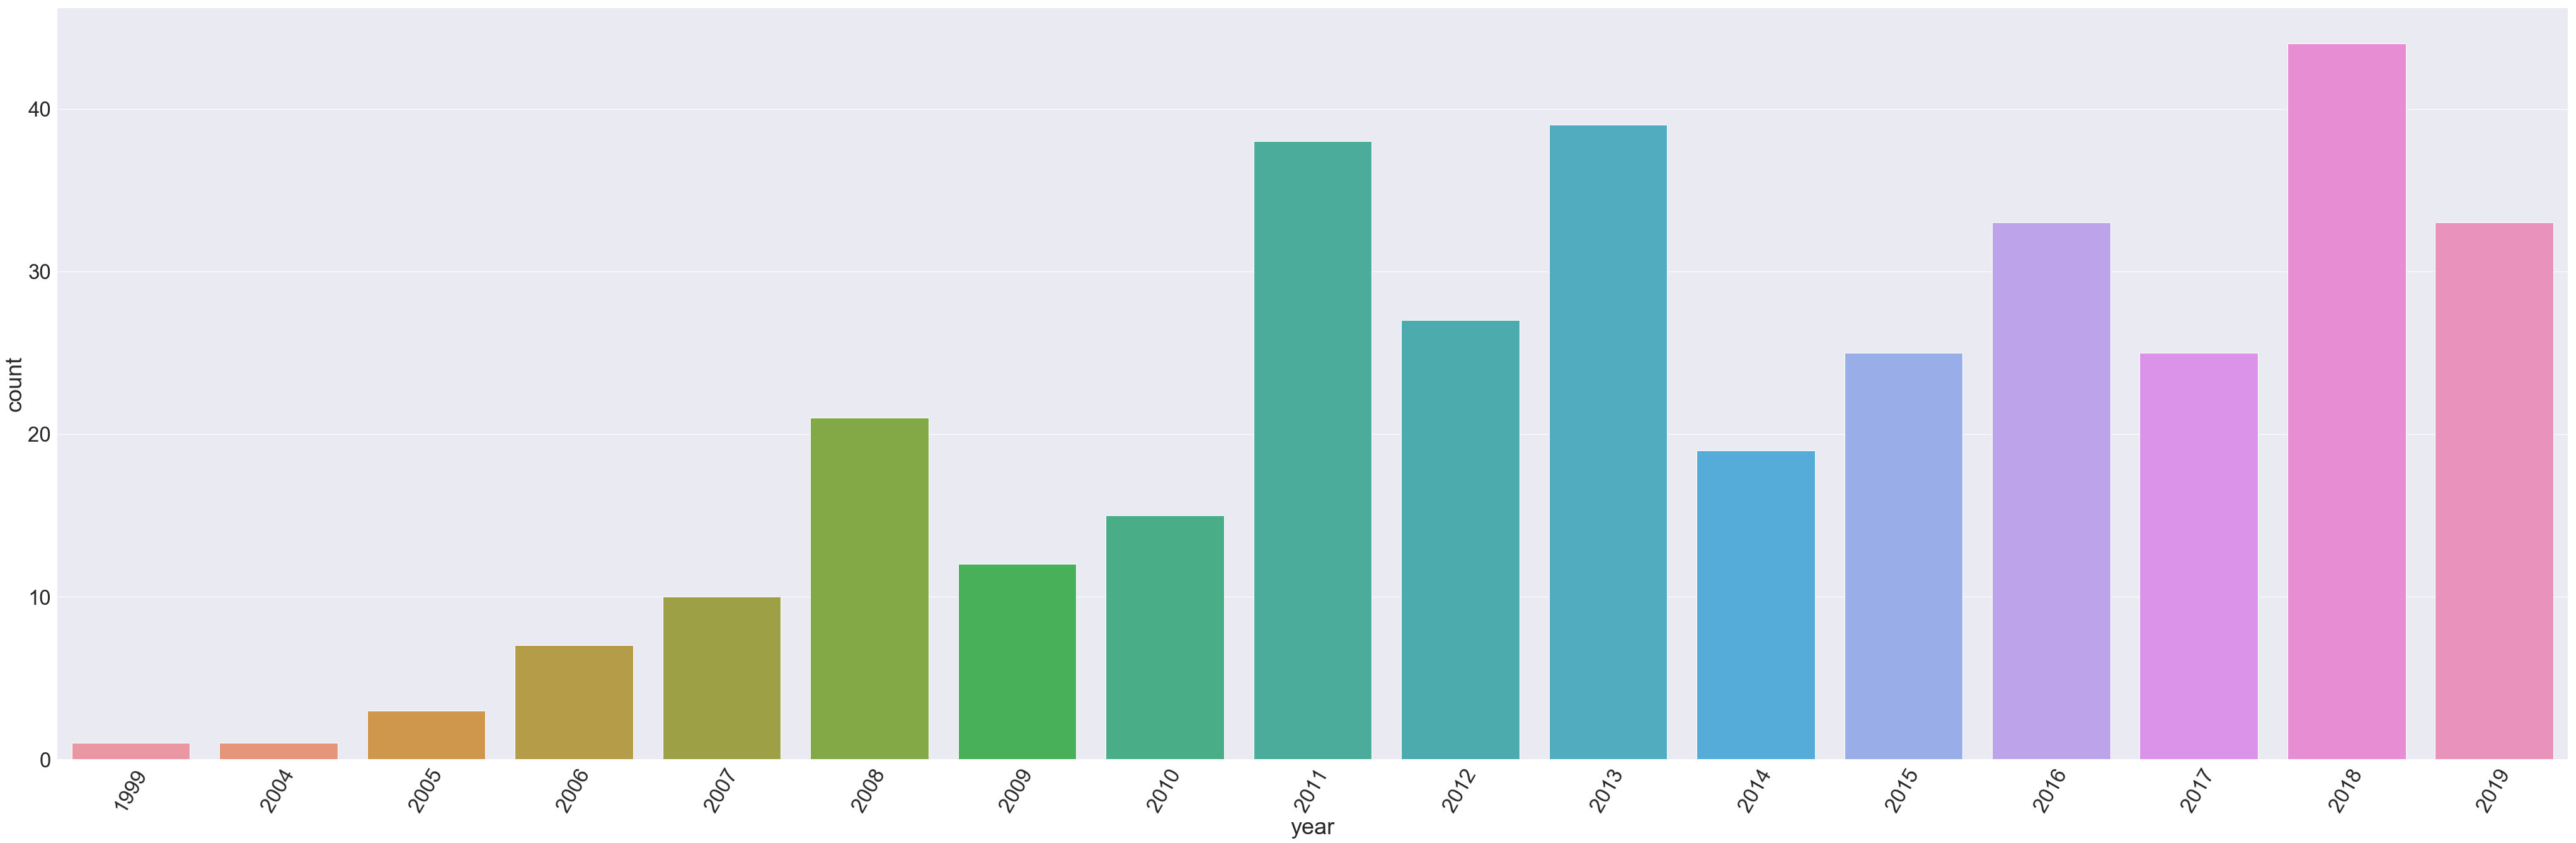

In [316]:
g = sns.catplot(x="year", y="count",kind='bar', data=plot_data,aspect=6)
g.set_xticklabels(rotation=60)
g.fig.set_size_inches(60,30)
sns.set(font_scale = 2)

From 1999 to 2019, there are more data leakages happened after 2008, 

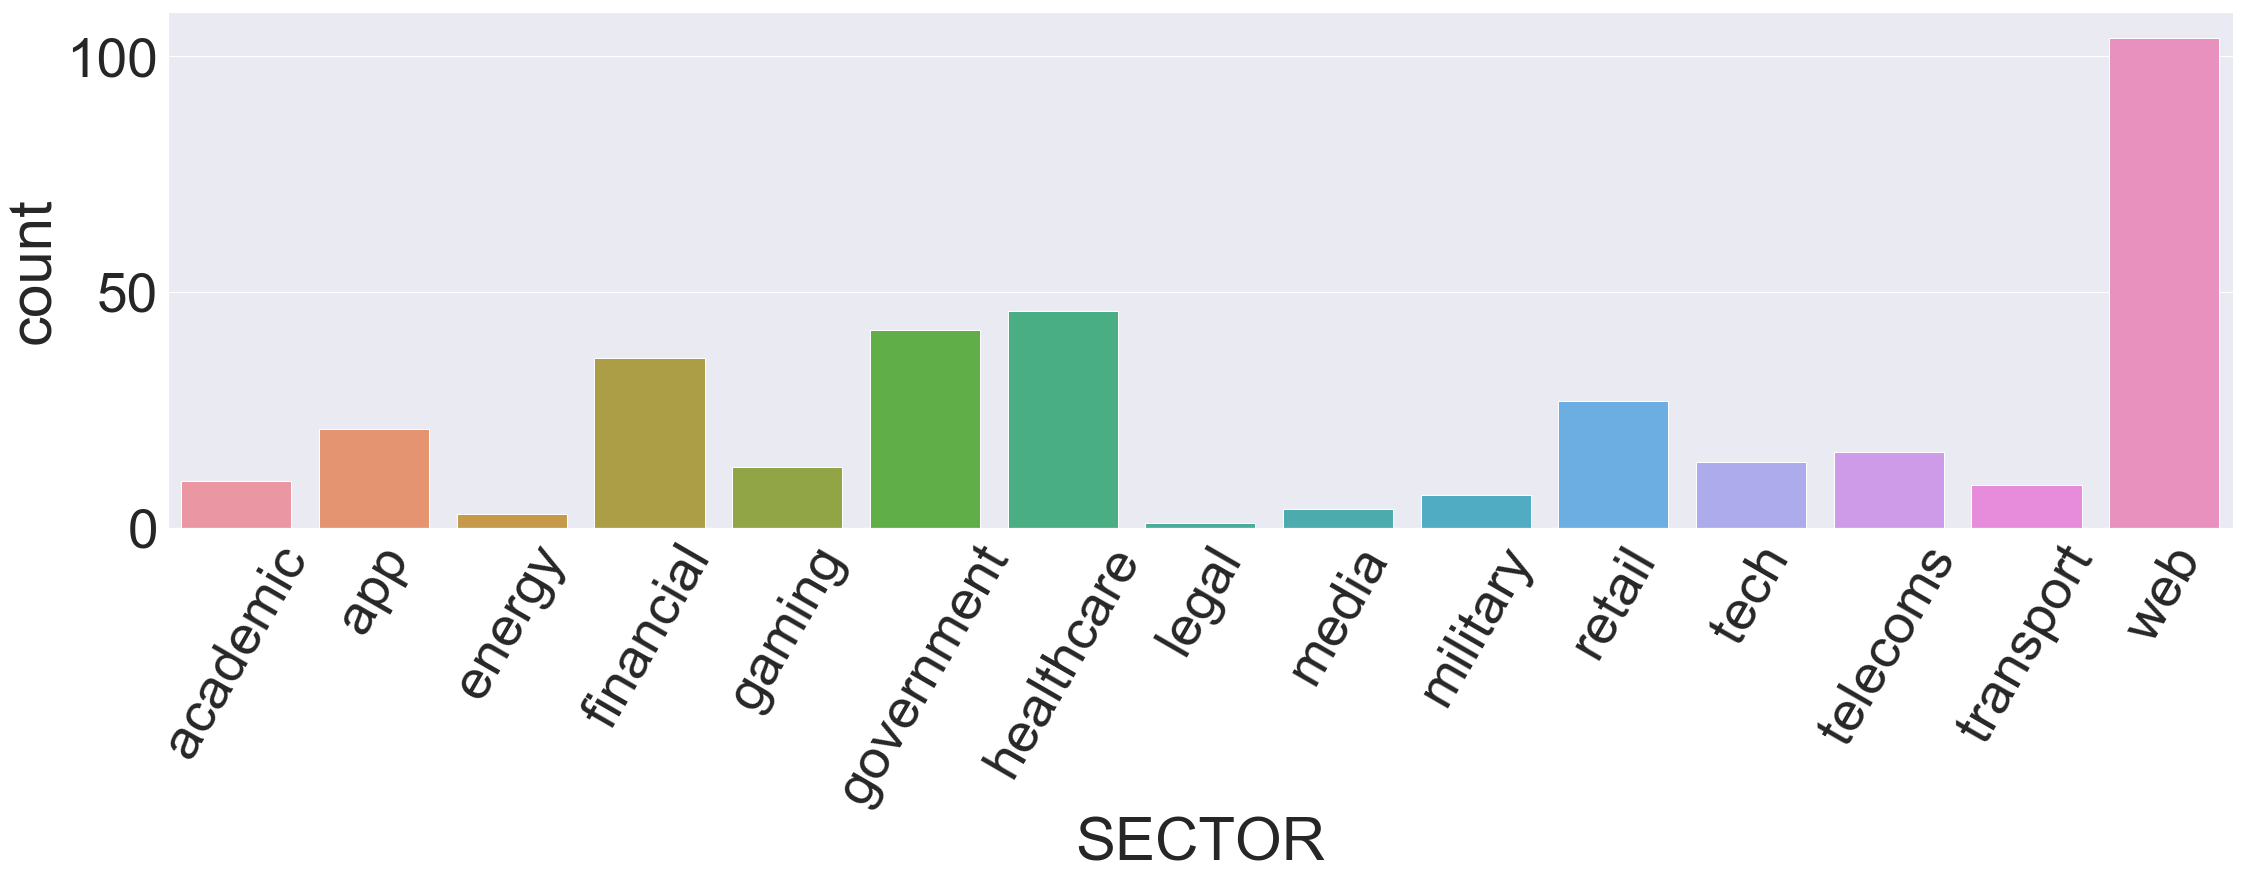

In [272]:
g = sns.catplot(x='SECTOR',y='count',data= sd,kind='bar')
g.set_xticklabels(rotation=60)
g.fig.set_size_inches(80,17)

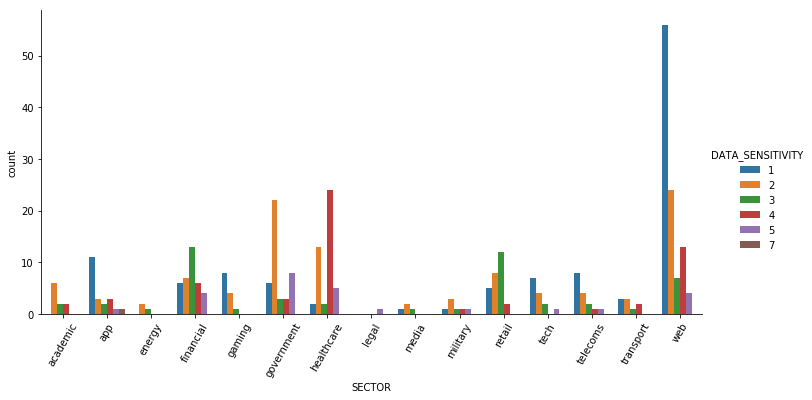

In [49]:
plot_data = df3.groupby(['SECTOR','DATA_SENSITIVITY']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','DATA_SENSITIVITY','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "DATA_SENSITIVITY" ,data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

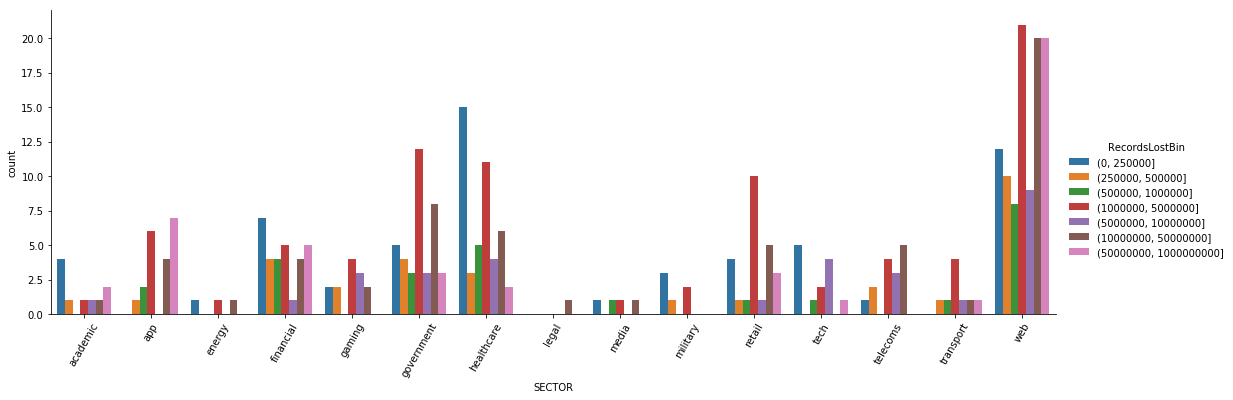

In [70]:
plot_data = df3.groupby(['SECTOR','RecordsLostBin']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','RecordsLostBin','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "RecordsLostBin" ,data=plot_data,aspect=3)
g.set_xticklabels(rotation=60)

Diving into SECTOR, compared with RecordsLostBin and DATA_SENSITIVITY, we can see that each sector has its own partten<br>
For example, web data leakages have a lower data sensitivity level, larger data size, and higher frequency. Healthcare data leakages have a higher data sensitivity level with smaller data size.

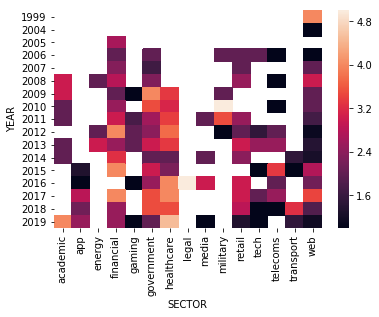

In [204]:
plot_data = df3.groupby(['YEAR', 'SECTOR'])['DATA_SENSITIVITY'].agg('mean').to_frame().reset_index().pivot('YEAR', 'SECTOR', 'DATA_SENSITIVITY')
sns.heatmap(plot_data)

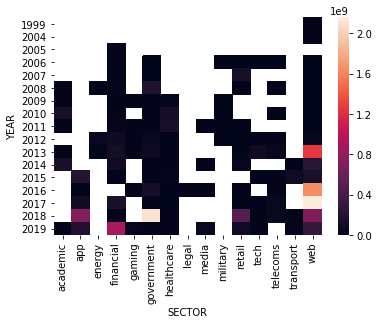

In [191]:
plot_data = df3.groupby(['YEAR', 'SECTOR'])['RecordsLostClean'].sum().to_frame().dropna().reset_index().pivot('YEAR', 'SECTOR', 'RecordsLostClean')
sns.heatmap(plot_data)

We can see that web entity continuously has data leakage,  after 2008, healthcare with higher sensitivity level.

Now we can do some text analysis with story

In [65]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [66]:
text = " ".join(story.lower() for story in df3.Story)
print ("There are {} words in the combination of all story.".format(len(text)))

There are 69347 words in the combination of all story.


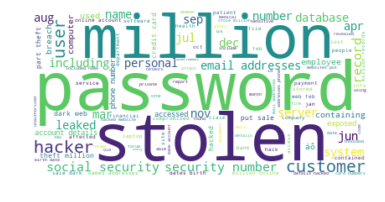

<Figure size 4320x2160 with 0 Axes>

In [67]:
stopwords = set(STOPWORDS)
stopwords.update(["data", "information", "may"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[60,30])
plt.show()

### Summary<br>
1.Most data leakage happened in web by hacking.<br>
2.Data leakages in healthcare exposed more sensitive data.<br>
3.Data leakages happened more and more frequently after 2008.<br>
4.password, million are mentioned in data leakage news with highest frequency, it shows that once data leakages happened, it alway affect millions of people, and people should pay more attention to their password, like update password in time, set up a complicated password.

### Further Research<br>
1.Using machine learning model(logit, decision tree, cluster) to figure out the probability of data leakage.<br>
2.Giving data safety suggestion to prevent data leakage<br>
3.Building scraper gathering more information and data.<br>

# 5.Presentation

# Overview
### Nowadays, technologies rebuilt people's daily life, data safety draw more and more attention, from this personal data leakage data set, with 339 records of data leakage, from 1999 to 2019, we may get an idea of the data leakages and how to prevent it.

## Reason
Most data leakage caused by hacking, but for healthcare, lost device caused the largest nmuber of data leakage.

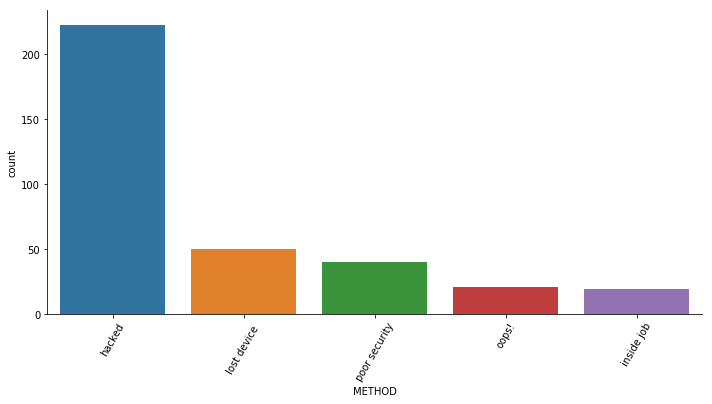

In [39]:
plot_data = df3['METHOD'].value_counts(dropna=False).to_frame().reset_index()
plot_data.columns=['METHOD','count']
g = sns.catplot(x="METHOD", y="count",kind='bar', data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

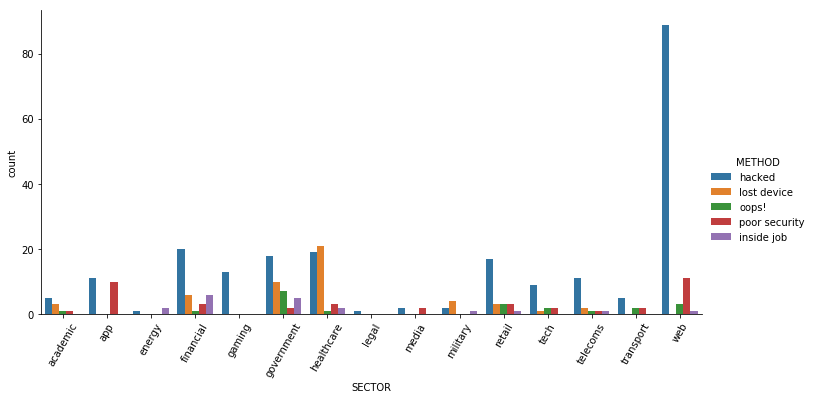

In [48]:
plot_data = df3.groupby(['SECTOR','METHOD']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','METHOD','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "METHOD" ,data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

## Data 
size


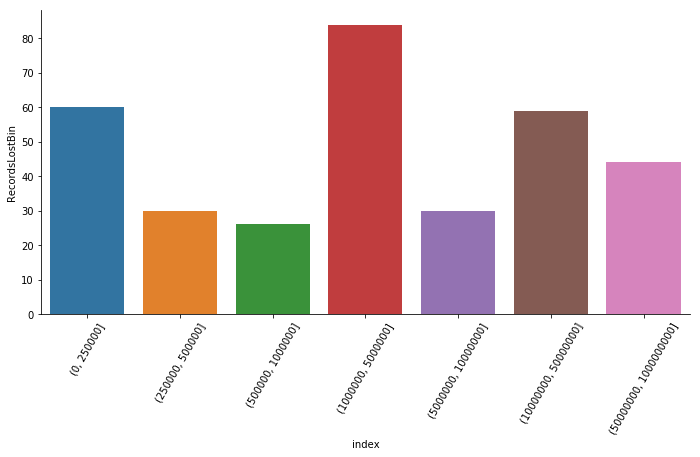

In [176]:
plot_data = df3['RecordsLostBin'].value_counts().to_frame().reset_index()
g = sns.catplot(x="index", y="RecordsLostBin",kind='bar', data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

## Time Trending
From 1999 to 2019, there are more data leakages happened after 2008

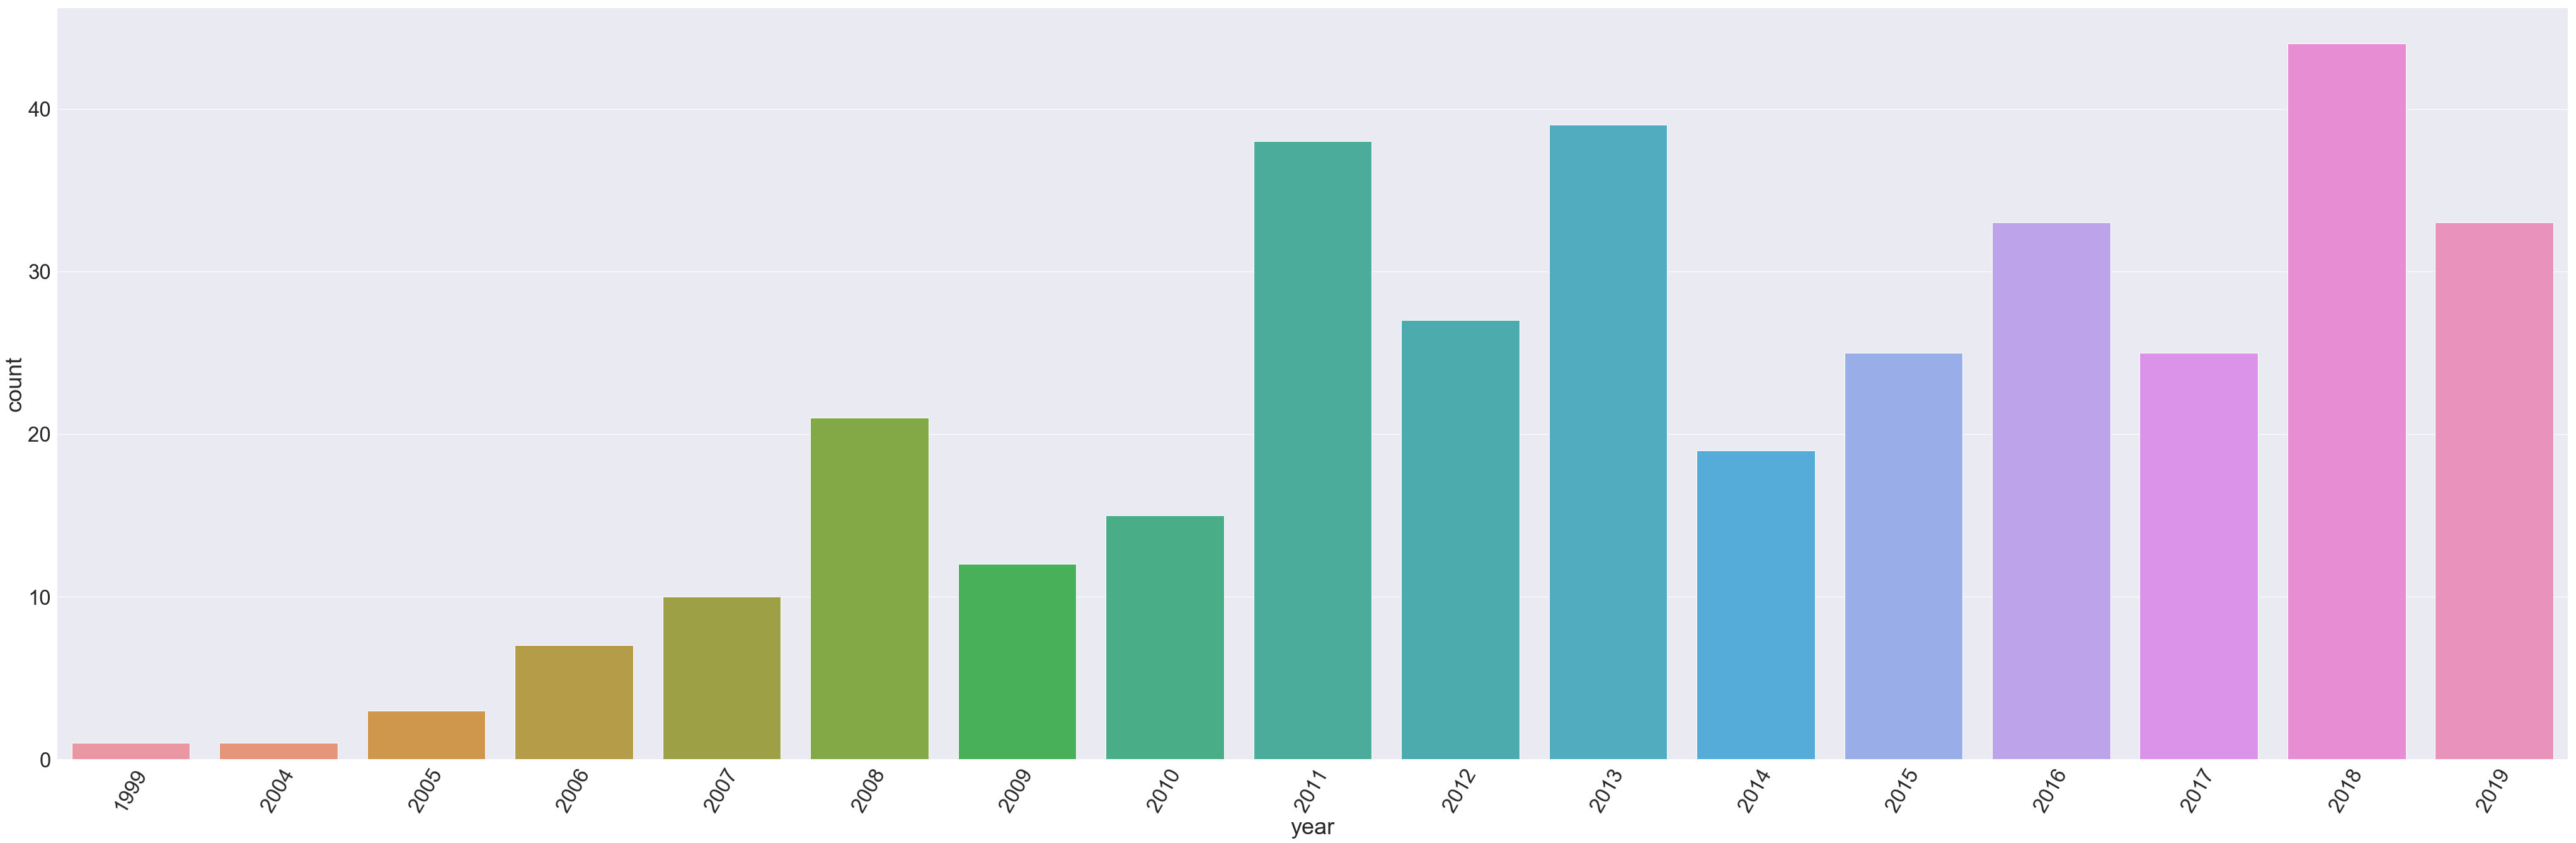

In [316]:
plot_data = df3['YEAR'].value_counts().to_frame().reset_index()
plot_data.columns = ['year', 'count']
g = sns.catplot(x="year", y="count",kind='bar', data=plot_data,aspect=6)
g.set_xticklabels(rotation=60)
g.fig.set_size_inches(60,30)
sns.set(font_scale = 2)

## Sector
Web has the largest number of data leakage happened, and then healthcare, government, financial.
Diving into SECTOR, compared with RecordsLostBin and DATA_SENSITIVITY, we can see that each sector has its own partten.<br>
For example, web data leakages have a lower data sensitivity level, larger data size, and higher frequency. Healthcare data leakages have a higher data sensitivity level with smaller data size.

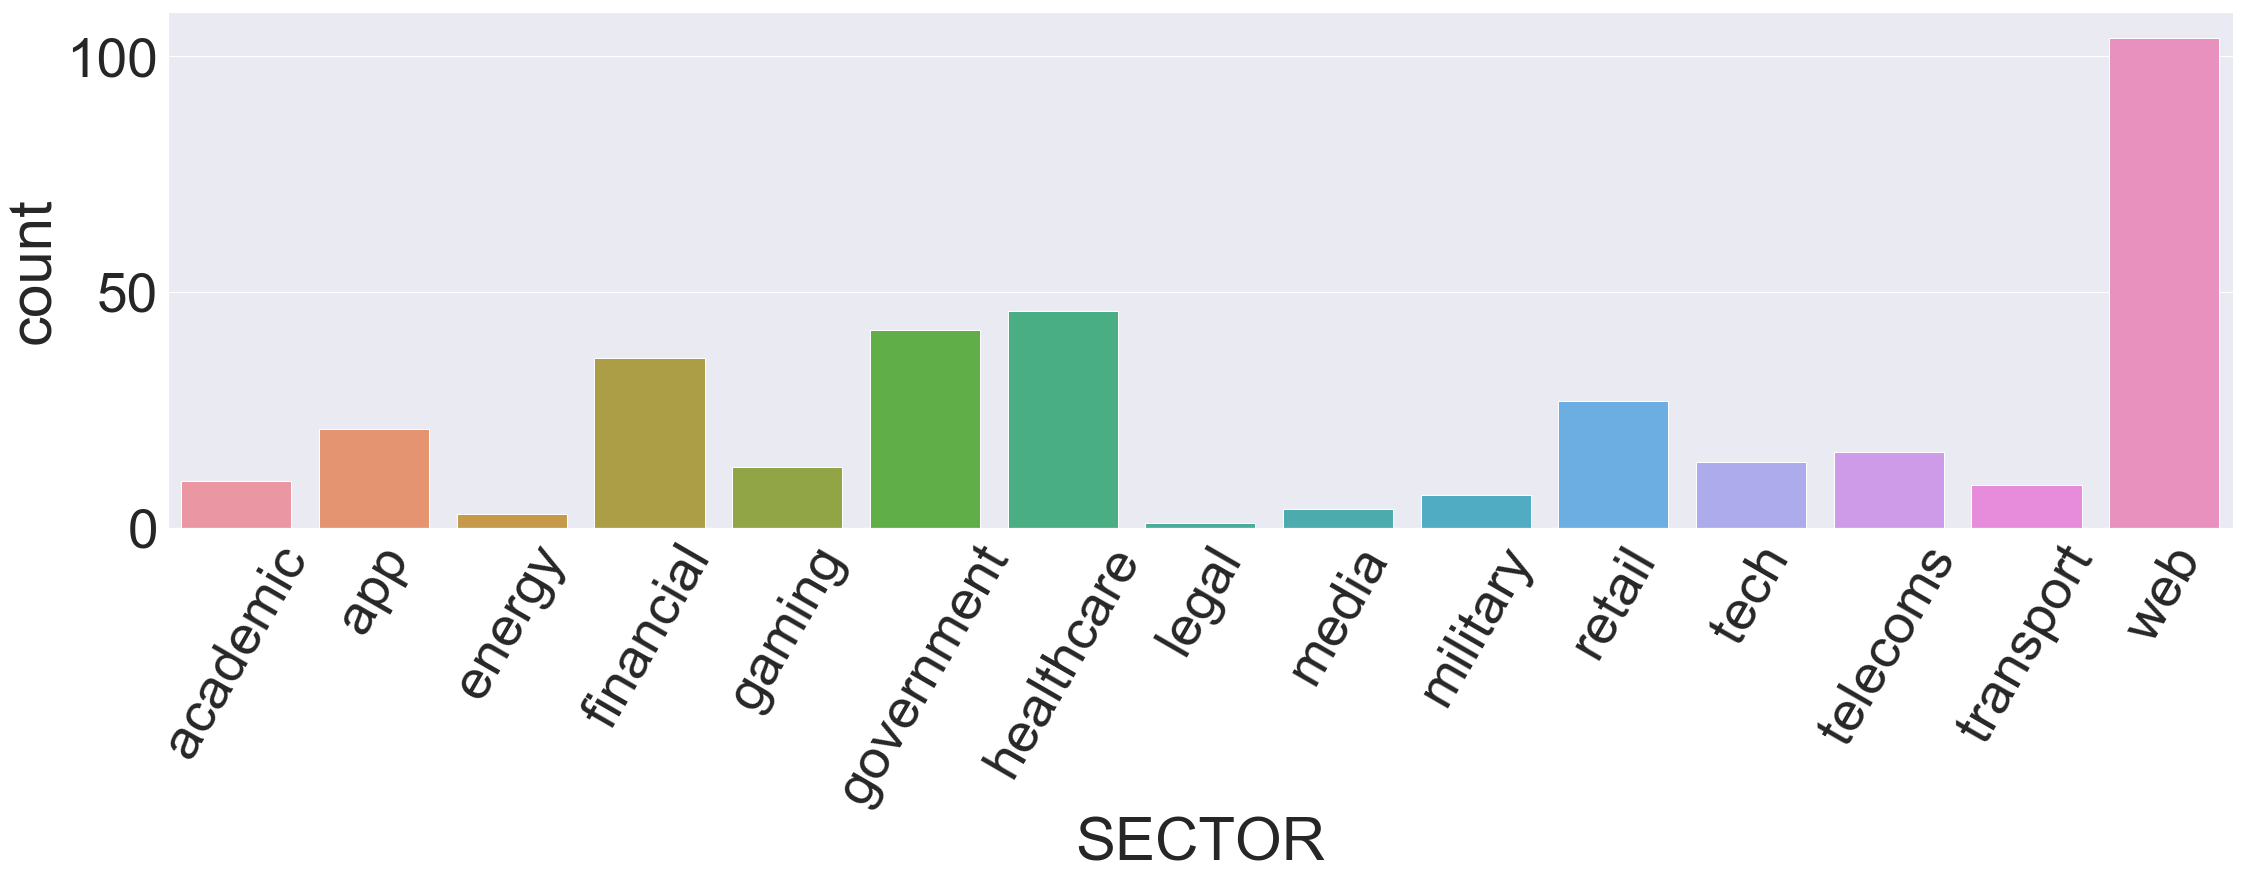

In [272]:
g = sns.catplot(x='SECTOR',y='count',data= sd,kind='bar')
g.set_xticklabels(rotation=60)
g.fig.set_size_inches(80,17)

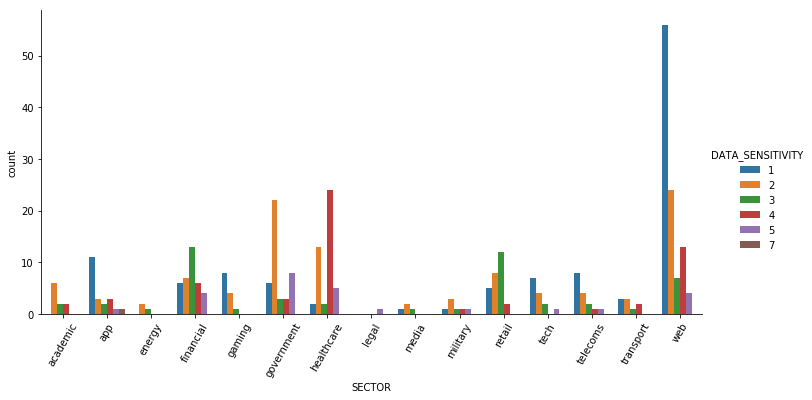

In [49]:
plot_data = df3.groupby(['SECTOR','DATA_SENSITIVITY']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','DATA_SENSITIVITY','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "DATA_SENSITIVITY" ,data=plot_data,aspect=2)
g.set_xticklabels(rotation=60)

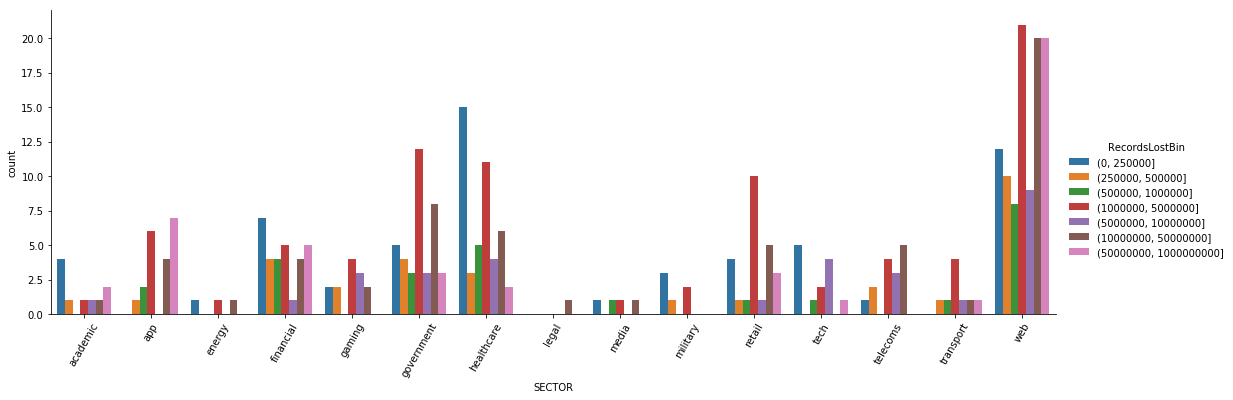

In [70]:
plot_data = df3.groupby(['SECTOR','RecordsLostBin']).size().to_frame().reset_index()
plot_data.columns=['SECTOR','RecordsLostBin','count']
g = sns.catplot(x='SECTOR', y="count",kind='bar', hue = "RecordsLostBin" ,data=plot_data,aspect=3)
g.set_xticklabels(rotation=60)

We can see that web entity continuously has data leakage,  after 2008, healthcare with higher sensitivity level.

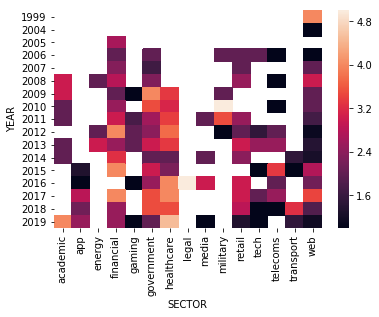

In [204]:
plot_data = df3.groupby(['YEAR', 'SECTOR'])['DATA_SENSITIVITY'].agg('mean').to_frame().reset_index().pivot('YEAR', 'SECTOR', 'DATA_SENSITIVITY')
sns.heatmap(plot_data)

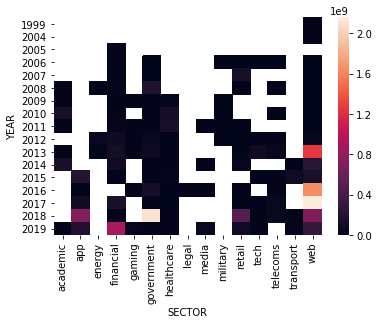

In [191]:
plot_data = df3.groupby(['YEAR', 'SECTOR'])['RecordsLostClean'].sum().to_frame().dropna().reset_index().pivot('YEAR', 'SECTOR', 'RecordsLostClean')
sns.heatmap(plot_data)

## Story<br>
password, million are mentioned in data leakage news with highest frequency, it shows that once data leakages happened, it alway affect millions of people, and people should pay more attention to their password, like update password in time, set up a complicated password.

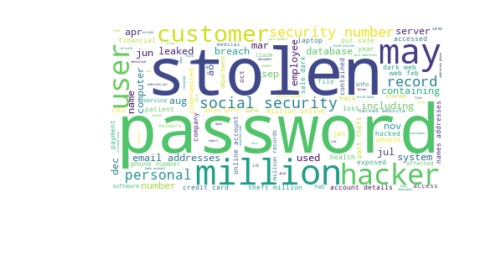

<Figure size 4320x2160 with 0 Axes>

In [292]:
stopwords = set(STOPWORDS)
stopwords.update(["data", "information"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[60,30])
plt.show()

# Takeaway <br>

1.Most data leakage happened in web by hacking.<br>
2.Data leakages in healthcare exposed more sensitive data.<br>
3.Data leakages happened more and more frequently after 2008.<br>
4.Using machine learning model(logit, decision tree, cluster) to figure out the probability of data leakage.
5.Giving data safety suggestion to prevent data leakage
6.Building scraper gathering more information and data.